### **Grupo**:

> Andriano Toazza

> Eduardo Rodrigues

> Kamily Grolli

> Ueslei Dalmina

# **Leitura de dados**

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('StressLevelDataset.csv')

In [4]:
dataset.head(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


# **Pré-processamento**

### **Ajuste do campo de nível de estresse para que apenas traga quem informou que não tem estresse ou que o estresse seja igual a 2, que depois também é substituido**

In [5]:
dataset = dataset.loc[dataset['stress_level'] != 1]

In [6]:
dataset['stress_level'] = dataset['stress_level'].replace({2: 1})

<ipython-input-6-f64350df90b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['stress_level'] = dataset['stress_level'].replace({2: 1})


## **Informações do Dataset, existem valores nulos?**

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 1 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 742 non-null    int64
 1   self_esteem                   742 non-null    int64
 2   mental_health_history         742 non-null    int64
 3   depression                    742 non-null    int64
 4   headache                      742 non-null    int64
 5   blood_pressure                742 non-null    int64
 6   sleep_quality                 742 non-null    int64
 7   breathing_problem             742 non-null    int64
 8   noise_level                   742 non-null    int64
 9   living_conditions             742 non-null    int64
 10  safety                        742 non-null    int64
 11  basic_needs                   742 non-null    int64
 12  academic_performance          742 non-null    int64
 13  study_load                    742 

## **Existem valores NaN?**

In [8]:
dataset.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

## **Existem outliers?**

In [9]:
import seaborn as sns

<Axes: >

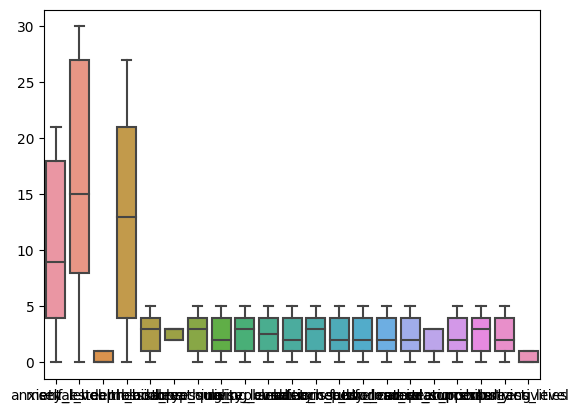

In [10]:
sns.boxplot(dataset)

# **Análise de correlação**

In [11]:
import matplotlib.pyplot as plt

In [12]:
dataset.corrwith(dataset['stress_level'])
#bullying
#blood_pressure
# + autoestima - estresse, por isso correlação inversa, mesma coisa com qualidade do sono, condições de vida, performance acadêmica...

anxiety_level                   0.766824
self_esteem                    -0.802398
mental_health_history           0.789757
depression                      0.763948
headache                        0.758329
blood_pressure                  0.819423
sleep_quality                  -0.790495
breathing_problem               0.662696
noise_level                     0.709672
living_conditions              -0.637267
safety                         -0.760494
basic_needs                    -0.762313
academic_performance           -0.770351
study_load                      0.683330
teacher_student_relationship   -0.723459
future_career_concerns          0.781426
social_support                 -0.755530
peer_pressure                   0.739267
extracurricular_activities      0.739945
bullying                        0.794083
stress_level                    1.000000
dtype: float64

## **Quão comum é o bullying?**

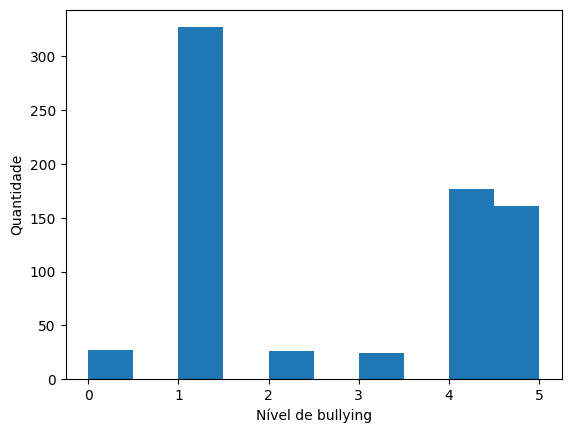

In [13]:
plt.hist(dataset.bullying)
plt.xlabel('Nível de bullying')
plt.ylabel('Quantidade')

plt.show()

In [14]:
avg_bullying = dataset['bullying'].mean()
avg_bullying

2.646900269541779

# **Algoritmos IA**

#### Separando a coluna categórica das demais, e fazendo o mesmo com dados de treino e teste.

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['stress_level'])
y = dataset.stress_level

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.4, random_state=12)

## **KNN**

In [16]:
import numpy as np

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
neighbors = np.arange(1, 20)
acuracia_treino = np.empty(len(neighbors))
acuracia_teste = np.empty(len(neighbors))

for i,k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_treino, y_treino)

    acuracia_treino[i] = knn.score(X_treino, y_treino)
    acuracia_teste[i] = knn.score(X_teste, y_teste)

### **Com quantos vizinhos a acurácia é maior?**

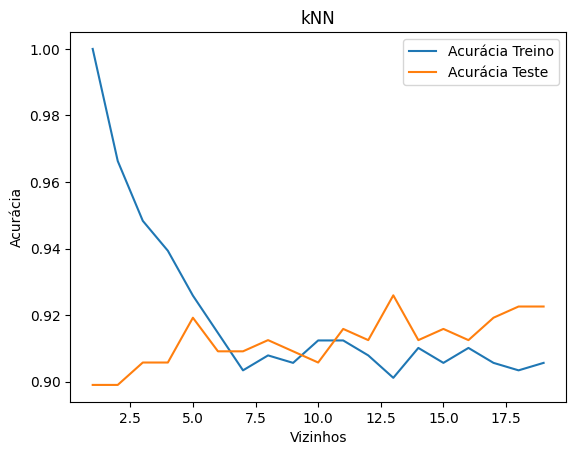

In [19]:
plt.title('kNN')
plt.plot(neighbors, acuracia_treino, label='Acurácia Treino')
plt.plot(neighbors, acuracia_teste, label='Acurácia Teste')
plt.legend()
plt.xlabel('Vizinhos')
plt.ylabel('Acurácia')
plt.show()

### **Matriz de confusão e Acurácia**

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
knn.score(X_teste, y_teste)

0.9225589225589226

In [22]:
y_pred = knn.predict(X_teste)

pd.crosstab(y_teste, y_pred, rownames=['Verdadeiro'], colnames=['Predito'], margins=True)

Predito,0,1,All
Verdadeiro,,,
0,135,12,147
1,11,139,150
All,146,151,297


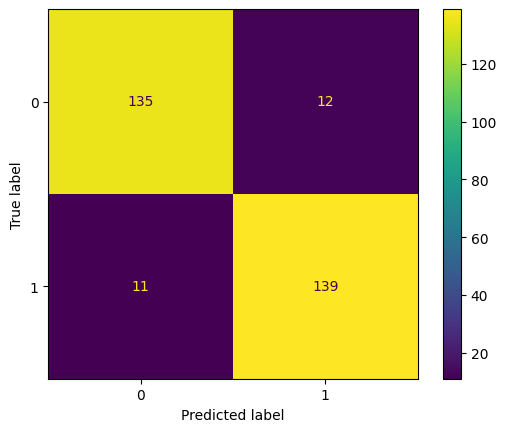

In [23]:
cm1 = confusion_matrix(y_teste, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=knn.classes_)
disp.plot()
plt.show()

## **Naive Bayes**

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
clf = GaussianNB()
clf.fit(X_treino, y_treino)

GaussianNB()

### **Matriz de confusão e Acurácia**

In [26]:
clf.score(X_teste, y_teste)

0.9124579124579124

In [27]:
preds = clf.predict(X_teste)

pd.crosstab(y_teste, preds, rownames=['Verdadeiro'], colnames=['Predito'], margins=True)

Predito,0,1,All
Verdadeiro,,,
0,130,17,147
1,9,141,150
All,139,158,297


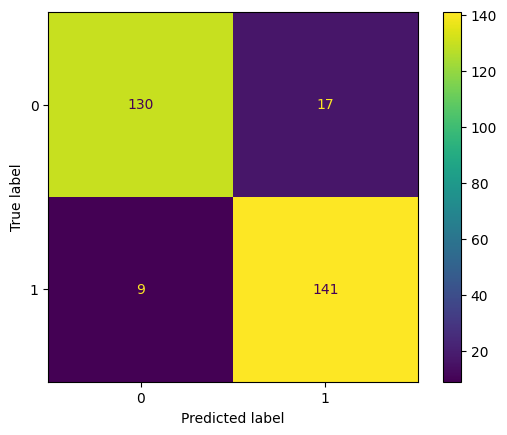

In [28]:
cm2 = confusion_matrix(y_teste, preds, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf.classes_)
disp.plot()
plt.show()

# **Formulação de Hipóteses**

Nesta seção, formulamos algumas hipóteses com base nos dados disponíveis. Estas hipóteses ajudarão a guiar a análise subsequente.




1. **Correlação entre Ansiedade e Qualidade do Sono**: Existe uma correlação positiva entre os níveis de ansiedade e a qualidade do sono dos indivíduos. Espera-se que indivíduos com maior ansiedade tenham uma qualidade de sono mais baixa.

In [29]:
correlation_anxiety_sleep = dataset[['anxiety_level', 'sleep_quality']].corr()
print("Correlação entre Níveis de Ansiedade e Qualidade do Sono:")
print(correlation_anxiety_sleep)




Correlação entre Níveis de Ansiedade e Qualidade do Sono:
               anxiety_level  sleep_quality
anxiety_level       1.000000      -0.766414
sleep_quality      -0.766414       1.000000


2. **Relação entre Pressão Sanguínea e Problemas Respiratórios**: Indivíduos com níveis mais altos de pressão sanguínea têm maior probabilidade de enfrentar problemas respiratórios.



In [30]:
correlation_bloodpressure_breathing = dataset[['blood_pressure', 'breathing_problem']].corr()
print("Correlação entre Pressão Sanguínea e Problemas Respiratórios:")
print(correlation_bloodpressure_breathing)




Correlação entre Pressão Sanguínea e Problemas Respiratórios:
                   blood_pressure  breathing_problem
blood_pressure           1.000000           0.645586
breathing_problem        0.645586           1.000000


3. **Padrões em Histórico de Saúde Mental e Depressão**: Indivíduos com histórico de problemas de saúde mental tendem a relatar maiores níveis de depressão.



In [31]:
average_depression = dataset.groupby('mental_health_history')['depression'].mean()
print("Média de Depressão por Histórico de Saúde Mental:")
print(average_depression)

Média de Depressão por Histórico de Saúde Mental:
mental_health_history
0     5.890667
1    20.029973
Name: depression, dtype: float64


# **Possíveis melhorias**

**Melhoria na Qualidade dos Dados:**
* Enriquecimento de Dados: Considerar a adição de mais variáveis que podem ser relevantes para o estudo, como dados demográficos ou contextuais.


**Análise Exploratória Mais Aprofundada:**
* Visualizações Avançadas: Utilizar gráficos mais sofisticados para uma compreensão mais profunda das relações entre variáveis.
* Análise Estatística Detalhada: Realizar testes estatísticos mais rigorosos para confirmar ou refutar as hipóteses.


**Modelagem de Dados:**
* Experimentar com Diferentes Modelos: Testar diversos algoritmos de machine learning e comparar seus desempenhos.
* Ajuste Fino de Modelos (Tuning): Realizar a otimização de hiperparâmetros para melhorar o desempenho dos modelos.


**Validação Cruzada e Avaliação de Modelo:**
* Robustez do Modelo: Utilizar técnicas de validação cruzada para garantir a robustez e generalização do modelo.
* Métricas de Desempenho: Adotar múltiplas métricas para uma avaliação abrangente do modelo.


**Interpretabilidade e Explicabilidade:**
* Explicação dos Resultados do Modelo: Utilizar técnicas como SHAP ou LIME para explicar as previsões do modelo.
* Relatório Detalhado: Preparar um relatório detalhado sobre os resultados, incluindo interpretações e limitações.


**Aspectos Éticos e de Privacidade:**
* Considerações Éticas: Discutir implicações éticas relacionadas ao uso dos dados e resultados do modelo.
* Privacidade dos Dados: Garantir que a privacidade dos dados seja mantida e que os regulamentos aplicáveis sejam seguidos.